# Optimización de precios

Autor: Sergio Diaz Paredes

Contacto: [Linkedin](https://www.linkedin.com/in/sergio-diaz-paredes/)

## Caso

En el contexto de la distribución de yogures artesanales, la empresa ha logrado determinar un precio óptimo de venta basado en la elasticidad de la demanda y su capacidad para maximizar los ingresos. Sin embargo, recientemente el proveedor ha solicitado un reajuste en el precio por el cual la empresa distribuidora compra los yogures, lo que afectará directamente la estructura de costos de la empresa. Este reajuste se basa en un esquema de costos escalonados, donde el precio unitario de compra del yogurt varía según la cantidad mensual adquirida:

- Si se compran al menos 2,000 unidades, el precio unitario será de 3.7 soles.
- Si se compran al menos 5,000 unidades, el precio unitario será de 3.2 soles.
- Si se compran al menos 8,000 unidades, el precio unitario será de 2.5 soles.

El desafío ahora es analizar cómo estos cambios en el costo unitario afectan los beneficios de la empresa, tomando en cuenta los diferentes tramos de precios y su impacto en la cantidad demandada de yogurt. Este análisis se llevará a cabo utilizando una función de demanda estimada, la cual se basa en un modelo logarítmico que refleja la relación entre el precio de venta y la cantidad demandada.

El objetivo principal de este análisis es optimizar los beneficios de la empresa a partir de la función de demanda y el costo unitario, considerando los siguientes factores clave:

1. **Meta de ventas realista**: Se busca determinar un volumen de ventas mensual que sea alcanzable según las condiciones del mercado, teniendo en cuenta las variaciones en el costo unitario.
2. **Pronóstico de ventas**: Se realizará un pronóstico de ventas para los próximos 30 días, con base en la función de demanda y el precio de venta óptimo.
3. **Cálculo de ingresos y beneficios**: Finalmente, se calcularán los ingresos y beneficios esperados bajo diferentes escenarios de costo unitario, con el fin de identificar cuál estrategia de compra es más rentable para la empresa distribuidora.

## Paquetes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
from scipy.optimize import minimize_scalar
from scipy.optimize import minimize

In [2]:
link = "https://raw.githubusercontent.com/SergioDP94/Pricing/refs/heads/main/Data/elasticidad.csv"
data = pd.read_csv(link, parse_dates=['fecha'])
data.head()

,fecha,precio,cantidad
0,2018-01-01,7.8,516
1,2018-01-02,7.8,424
2,2018-01-03,7.8,334
3,2018-01-04,7.8,398
4,2018-01-05,7.8,454


In [3]:
data['dia_semana'] = data['fecha'].dt.day_name()
data.head()

,fecha,precio,cantidad,dia_semana
0,2018-01-01,7.8,516,Monday
1,2018-01-02,7.8,424,Tuesday
2,2018-01-03,7.8,334,Wednesday
3,2018-01-04,7.8,398,Thursday
4,2018-01-05,7.8,454,Friday


## Demanda lineal

In [4]:
elast_var = smf.ols(formula='cantidad ~ precio + C(dia_semana)', data=data).fit()
print(elast_var.summary())

                            OLS Regression Results                            
Dep. Variable:               cantidad   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     92.41
Date:                Thu, 09 Jan 2025   Prob (F-statistic):           1.83e-89
Time:                        07:06:10   Log-Likelihood:                -3768.5
No. Observations:                 574   AIC:                             7553.
Df Residuals:                     566   BIC:                             7588.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

En el caso de un modelo de demanda lineal, la ecuación se representa como:

$$
Q = \beta_0 + \beta_1 P + \beta_2 D_{Monday} + \dots + \epsilon,
$$

donde:
- $ Q $: Cantidad demandada.
- $ P $: Precio.
- $ D_{Monday} $: Variable indicadora para el lunes (u otras variables categóricas).
- $ \beta_1 $: Coeficiente que mide la sensibilidad de la demanda al precio.

Sustituyendo esta ecuación en la función de ingresos:

$$
R = P \cdot Q,
$$

se obtiene:

$$
R = P \cdot \left(\beta_0 + \beta_1 P + \beta_2 D_{Monday} + \dots \right).
$$

Simplificando:

$$
R = \beta_0 P + \beta_1 P^2 + \beta_2 P \cdot D_{Monday} + \dots.
$$

### Optimización de Ingresos
Para determinar el precio que maximiza los ingresos, se deriva la función de ingresos con respecto al precio $ P $:

$$
\frac{dR}{dP} = \beta_0 + 2 \beta_1 P + \beta_2 D_{Monday}.
$$

Igualando a cero para encontrar el óptimo:

$$
\beta_0 + 2 \beta_1 P + \beta_2 D_{Monday} = 0.
$$

Resolviendo para $ P $:

$$
P^* = \frac{-(\beta_0 + \beta_2 D_{Monday})}{2 \beta_1}.
$$

### Interpretación
- El precio óptimo $ P^* $ depende de los coeficientes del modelo:
- $ \beta_0 $: Representa la intersección base de la demanda.
- $ \beta_1 $: Determina la sensibilidad de la demanda al precio. Es crucial que $ \beta_1 < 0 $, ya que una relación positiva entre precio y cantidad no tendría sentido económico.
- $ \beta_2 $: Ajusta el precio óptimo según la categoría de día (como los lunes, en este caso).
- Si $ \beta_1 $ es muy pequeño (en magnitud), $ P^* $ puede ser irrealmente alto o bajo, lo que sugiere revisar la especificación del modelo.

Este resultado muestra que, a diferencia de un modelo de elasticidad constante, en un modelo de demanda lineal, sí es posible encontrar un precio óptimo finito para maximizar los ingresos.

In [5]:
import numpy as np

# Coeficientes del modelo
beta_0 = elast_var.params['Intercept']
beta_1 = elast_var.params['precio']
beta_2 = elast_var.params['C(dia_semana)[T.Monday]']  # Ajusta esto si el nombre varía.

In [6]:
# Función de ingresos en función del precio
def ingresos_lin(precio):
    cantidad = beta_0 + beta_1 * precio + beta_2  # Demanda para "Monday"
    return precio * cantidad  # Ingresos = P * Q

In [7]:
# Derivada de los ingresos
def derivada_ingresos(precio):
    cantidad = beta_0 + beta_1 * precio + beta_2
    return cantidad + beta_1 * precio  # dR/dP

In [8]:
# Encontrar el precio óptimo numéricamente
from scipy.optimize import minimize_scalar

In [9]:
resultado = minimize_scalar(lambda p: -ingresos_lin(p), bounds=(0, 20), method='bounded')  # Ajusta el rango de precios según tu caso
precio_optimo = resultado.x
ingreso_maximo = -resultado.fun

print(f"Precio óptimo: {precio_optimo:.2f}")
print(f"Ingreso máximo: {ingreso_maximo:.2f}")

Precio óptimo: 5.73
Ingreso máximo: 3228.07


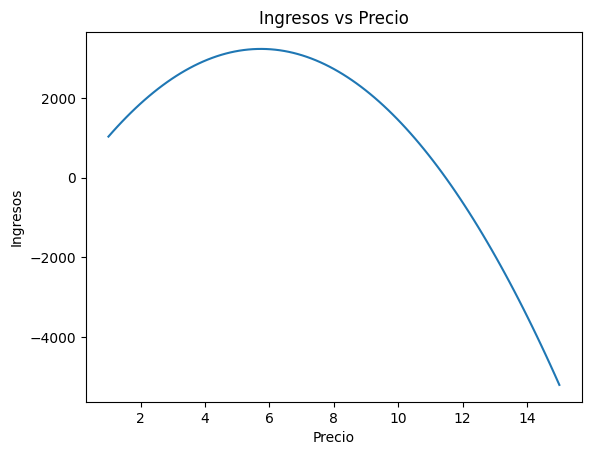

In [10]:
precios = np.linspace(1, 15, 101)  # Ajusta el rango según tus datos
ingresos_graficados = [ingresos_lin(p) for p in precios]

plt.plot(precios, ingresos_graficados)
plt.xlabel('Precio')
plt.ylabel('Ingresos')
plt.title('Ingresos vs Precio')
plt.show()

## Demanda logaritmica

Para optimizar los ingresos ($ R = P \cdot Q $) con un modelo logarítmico, debemos considerar que la relación logarítmica entre cantidad y precio implica:

$$
\ln(Q) = \beta_0 + \beta_1 \ln(P) + \beta_2 D_{Monday} + \dots + \epsilon
$$

Lo que equivale a:

$$
Q = e^{\beta_0} \cdot P^{\beta_1} \cdot e^{\beta_2 D_{Monday}}
$$

Sustituyendo esta ecuación de demanda en la función de ingresos:

$$
R = P \cdot Q = P \cdot \left(e^{\beta_0} \cdot P^{\beta_1} \cdot e^{\beta_2 D_{Monday}}\right)
$$

Se simplifica a:

$$
R = e^{\beta_0} \cdot e^{\beta_2 D_{Monday}} \cdot P^{1 + \beta_1}
$$

Nuestro objetivo es encontrar el $ P $ que maximiza $ R $. Esto se logra derivando $ R $ respecto a $ P $, igualando a cero y resolviendo.

In [11]:
elast_cte = smf.ols(formula='np.log(cantidad) ~ np.log(precio) + C(dia_semana)', data=data).fit()
print(elast_cte.summary())

                            OLS Regression Results                            
Dep. Variable:       np.log(cantidad)   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     330.8
Date:                Thu, 09 Jan 2025   Prob (F-statistic):          2.25e-195
Time:                        07:06:12   Log-Likelihood:                -45.689
No. Observations:                 574   AIC:                             107.4
Df Residuals:                     566   BIC:                             142.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

### Optimización

In [12]:
# Coeficientes del modelo
beta_0 = elast_cte.params['Intercept']
beta_1 = elast_cte.params['np.log(precio)']
beta_2 = elast_cte.params['C(dia_semana)[T.Monday]']  # Ajusta si el nombre varía.

# Constante para el día "Monday"
k = np.exp(beta_0 + beta_2)

# Función de ingresos en función del precio
def ingresos(precio):
    return k * (precio ** (1 + beta_1))  # R = k * P^(1 + beta_1)

# Encontrar el precio óptimo numéricamente
resultado = minimize_scalar(lambda p: -ingresos(p), bounds=(0.01, 1000), method='bounded')  # Evitamos log(0) con 0.01
precio_optimo = resultado.x
ingreso_maximo = -resultado.fun

print(f"Precio óptimo: {precio_optimo:.2f}")
print(f"Ingreso máximo: {ingreso_maximo:.2f}")

Precio óptimo: 0.01
Ingreso máximo: 66443.97


### Analisis



En el contexto de un modelo de elasticidad constante, donde la demanda se representa como:

$$
Q = k \cdot P^{\beta_1}
$$

la función de ingresos se define como:

$$
R = P \cdot Q = k \cdot P^{1 + \beta_1}.
$$

En este tipo de modelo, la relación entre el precio y los ingresos depende del valor del exponente $ 1 + \beta_1 $. En el caso analizado, la elasticidad precio de la demanda es $ \beta_1 = -1.4946 $, lo que implica:

$$
1 + \beta_1 = -0.4946.
$$

Con este resultado, la función de ingresos se reduce a una forma donde $ R $ es inversamente proporcional a $ P $ elevado a un exponente negativo, específicamente:

$$
R = k \cdot P^{-0.4946}.
$$

Este comportamiento indica que los ingresos aumentan indefinidamente a medida que el precio disminuye hacia cero. En otras palabras, no existe un precio finito que maximice los ingresos, ya que estos tienden a crecer sin límite conforme $ P \to 0 $.

Este resultado es típico de modelos de elasticidad constante cuando $ \beta_1 < -1 $, lo cual implica una respuesta extremadamente sensible de la cantidad demandada a cambios en el precio. Sin embargo, en contextos económicos reales, este resultado es poco práctico debido a limitaciones como:
- Costos de producción que impiden reducir precios indefinidamente.
- Restricciones en la capacidad de producción.
- Comportamientos de los consumidores que no son capturados adecuadamente por el modelo.

Por lo tanto, al observar este tipo de comportamiento en un modelo de elasticidad constante, es importante considerar:
1. Revisar los datos y la estimación del parámetro $ \beta_1 $ para validar su magnitud.
2. Introducir límites realistas en el rango de precios.
3. Explorar alternativas como modelos con elasticidades variables, que puedan capturar mejor las relaciones no lineales entre precio e ingresos.

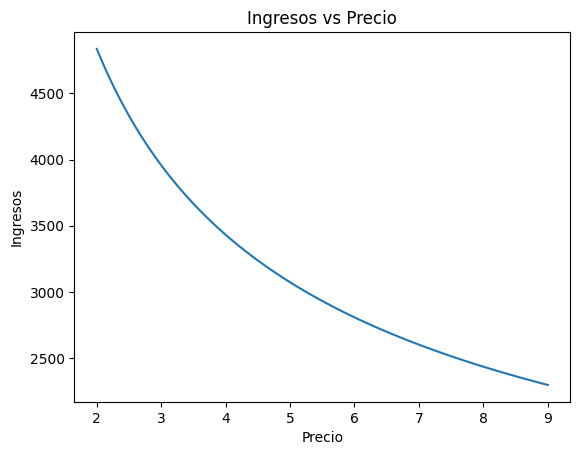

In [13]:
precios = np.linspace(2, 9, 101)  # Ajusta el rango según tus datos
ingresos_graficados = [ingresos(p) for p in precios]

plt.plot(precios, ingresos_graficados)
plt.xlabel('Precio')
plt.ylabel('Ingresos')
plt.title('Ingresos vs Precio')
plt.show()

## Optimización de beneficios

### Demanda Lineal

In [14]:
elast_var.predict({'precio': [5], 'dia_semana': ['Monday']})

,0
0,635.046153


In [15]:
# Definir la función de beneficio
def beneficio(precio, elast_var, costo_unitario=2):
    # Crear un DataFrame con una sola fila que tenga el precio y el dia_semana como "Monday"
    # Predecir la cantidad utilizando el modelo de elasticidad
    cantidad_predicha = elast_var.predict({'precio': [precio], 'dia_semana': ['Monday']})

    # Calcular el beneficio
    beneficio = (precio - costo_unitario) * cantidad_predicha
    return -np.sum(beneficio)  # Negativo porque estamos minimizando

In [16]:
# Usar scipy para encontrar el precio óptimo
resultado = minimize(lambda x: beneficio(x, elast_var), x0=[5.73], bounds=[(2, 10)])
precio_optimo = resultado.x[0]

# Imprimir resultados
print(f"Precio óptimo: {precio_optimo:.2f}")

Precio óptimo: 6.73


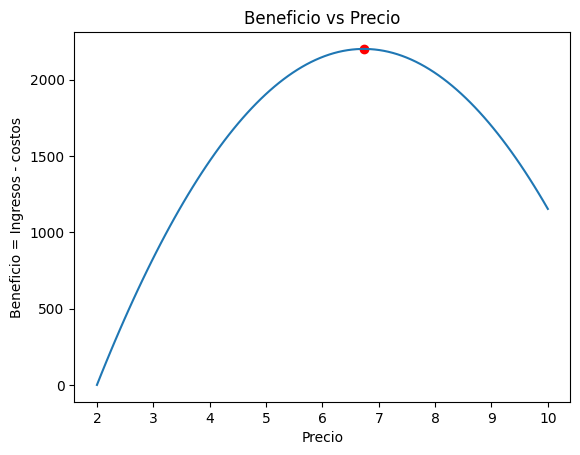

In [17]:
# Graficar beneficio vs precio
precios = np.linspace(2, 10, 100)
beneficios = [-beneficio(p, elast_var) for p in precios]

plt.plot(precios, beneficios)
plt.scatter(precio_optimo, -beneficio(precio_optimo, elast_var), color='red', label=f'Precio óptimo: {precio_optimo:.2f}')
plt.xlabel('Precio')
plt.ylabel('Beneficio = Ingresos - costos')
plt.title('Beneficio vs Precio')
plt.show()

### Demanda Logaritmica

In [18]:
# Definir la función de beneficio para demanda logarítmica
def beneficio(precio, elast_cte, costo_unitario=2):
    # Predecir el logaritmo de la cantidad utilizando el modelo de elasticidad
    log_cantidad_predicha = elast_cte.predict({'precio': [precio], 'dia_semana': ['Monday']})

    # Transformar la predicción logarítmica a la cantidad original
    cantidad_predicha = np.exp(log_cantidad_predicha)

    # Calcular el beneficio
    beneficio = (precio - costo_unitario) * cantidad_predicha
    return -np.sum(beneficio)  # Negativo porque estamos minimizando

In [19]:
# Usar scipy para encontrar el precio óptimo
resultado = minimize(lambda x: beneficio(x, elast_cte), x0=[5.73], bounds=[(2, 10)])
precio_optimo = resultado.x[0]
# Imprimir resultados
print(f"Precio óptimo: {precio_optimo:.2f}")

Precio óptimo: 6.04


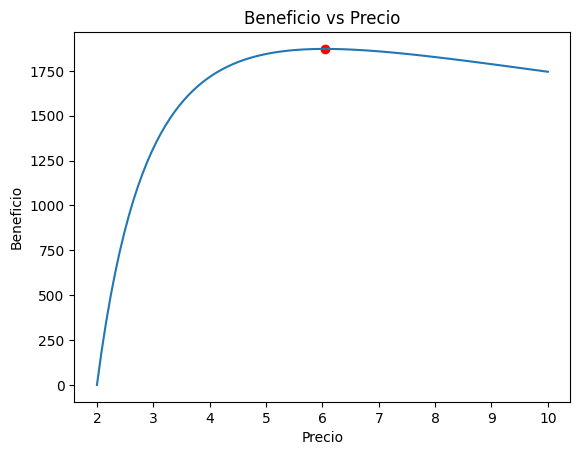

In [20]:
# Graficar beneficio vs precio
precios = np.linspace(2, 10, 100)
beneficios = [-beneficio(p, elast_cte) for p in precios]
plt.plot(precios, beneficios)
plt.scatter(precio_optimo, -beneficio(precio_optimo, elast_cte), color='red', label=f'Precio óptimo: {precio_optimo:.2f}')
plt.xlabel('Precio')
plt.ylabel('Beneficio')
plt.title('Beneficio vs Precio')
plt.show()

### Planificacion

In [21]:
def generar_new_data(data, dias_futuros):
    last_date = data['fecha'].max()  # Última fecha en el DataFrame original
    future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=dias_futuros, freq='D')

    # Crear un DataFrame con estas fechas y asignar el día de la semana
    new_data = pd.DataFrame(future_dates, columns=['fecha'])
    new_data['dia_semana'] = new_data['fecha'].dt.day_name()

    return new_data

In [22]:
generar_new_data(data, 5)

,fecha,dia_semana
0,2019-07-29,Monday
1,2019-07-30,Tuesday
2,2019-07-31,Wednesday
3,2019-08-01,Thursday
4,2019-08-02,Friday


¿Cuales son los precios optimos?

- Precio de compra = 3.7
- Precio de compra = 3.2
- Precio de compra = 2.5

In [23]:
escenarios = {'PrecioCompra1':3.7,'PrecioCompra2':3.2,'PrecioCompra3':2.5}

In [24]:
escenarios.items()

dict_items([('PrecioCompra1', 3.7), ('PrecioCompra2', 3.2), ('PrecioCompra3', 2.5)])

In [25]:
for name,costo_u in escenarios.items():
  resultado = minimize(lambda x: beneficio(x, elast_cte,costo_unitario=costo_u), x0=[5.73], bounds=[(2, 20)])
  precio_optimo = resultado.x[0]
  # Imprimir resultados
  print("-"*20)
  print(f"{name}\nCosto unitario: {costo_u:.2f}\nPrecio de venta óptimo: {precio_optimo:.2f}")

--------------------
PrecioCompra1
Costo unitario: 3.70
Precio de venta óptimo: 11.18
--------------------
PrecioCompra2
Costo unitario: 3.20
Precio de venta óptimo: 9.67
--------------------
PrecioCompra3
Costo unitario: 2.50
Precio de venta óptimo: 7.55


### Detalle de escenarios

In [26]:
futuro = generar_new_data(data,30)
futuro.head()

,fecha,dia_semana
0,2019-07-29,Monday
1,2019-07-30,Tuesday
2,2019-07-31,Wednesday
3,2019-08-01,Thursday
4,2019-08-02,Friday


In [27]:
for name,costo_u in escenarios.items():
  resultado = minimize(lambda x: beneficio(x, elast_cte,costo_unitario=costo_u), x0=[5.73], bounds=[(2, 20)])
  precio_optimo = resultado.x[0]

  futuro['precio'] = precio_optimo
  futuro[name+'cantidad'] = np.exp(elast_cte.predict(futuro))
  q = futuro[name+'cantidad'].sum()
  ing = precio_optimo*q
  ben = q*(precio_optimo-costo_u)
  #escenarios.update({name:futuro_})
  # Imprimir resultados
  print("-"*20)
  print(f"{name}\nCosto unitario: {costo_u:.2f}\nPrecio de venta óptimo: {precio_optimo:.2f}")
  print(f"Cantidad demandada: {q:.2f}\nIngresos Totales: {ing:.2f}\nBeneficios(*): {ben:.2f}")

--------------------
PrecioCompra1
Costo unitario: 3.70
Precio de venta óptimo: 11.18
Cantidad demandada: 4220.52
Ingresos Totales: 47188.38
Beneficios(*): 31572.46
--------------------
PrecioCompra2
Costo unitario: 3.20
Precio de venta óptimo: 9.67
Cantidad demandada: 5243.27
Ingresos Totales: 50701.46
Beneficios(*): 33923.00
--------------------
PrecioCompra3
Costo unitario: 2.50
Precio de venta óptimo: 7.55
Cantidad demandada: 7582.97
Ingresos Totales: 57285.83
Beneficios(*): 38328.41


- Si se compran al menos 2,000 unidades, el precio unitario será de 3.7 soles.
- Si se compran al menos 5,000 unidades, el precio unitario será de 3.2 soles.
- Si se compran al menos 8,000 unidades, el precio unitario será de 2.5 soles.


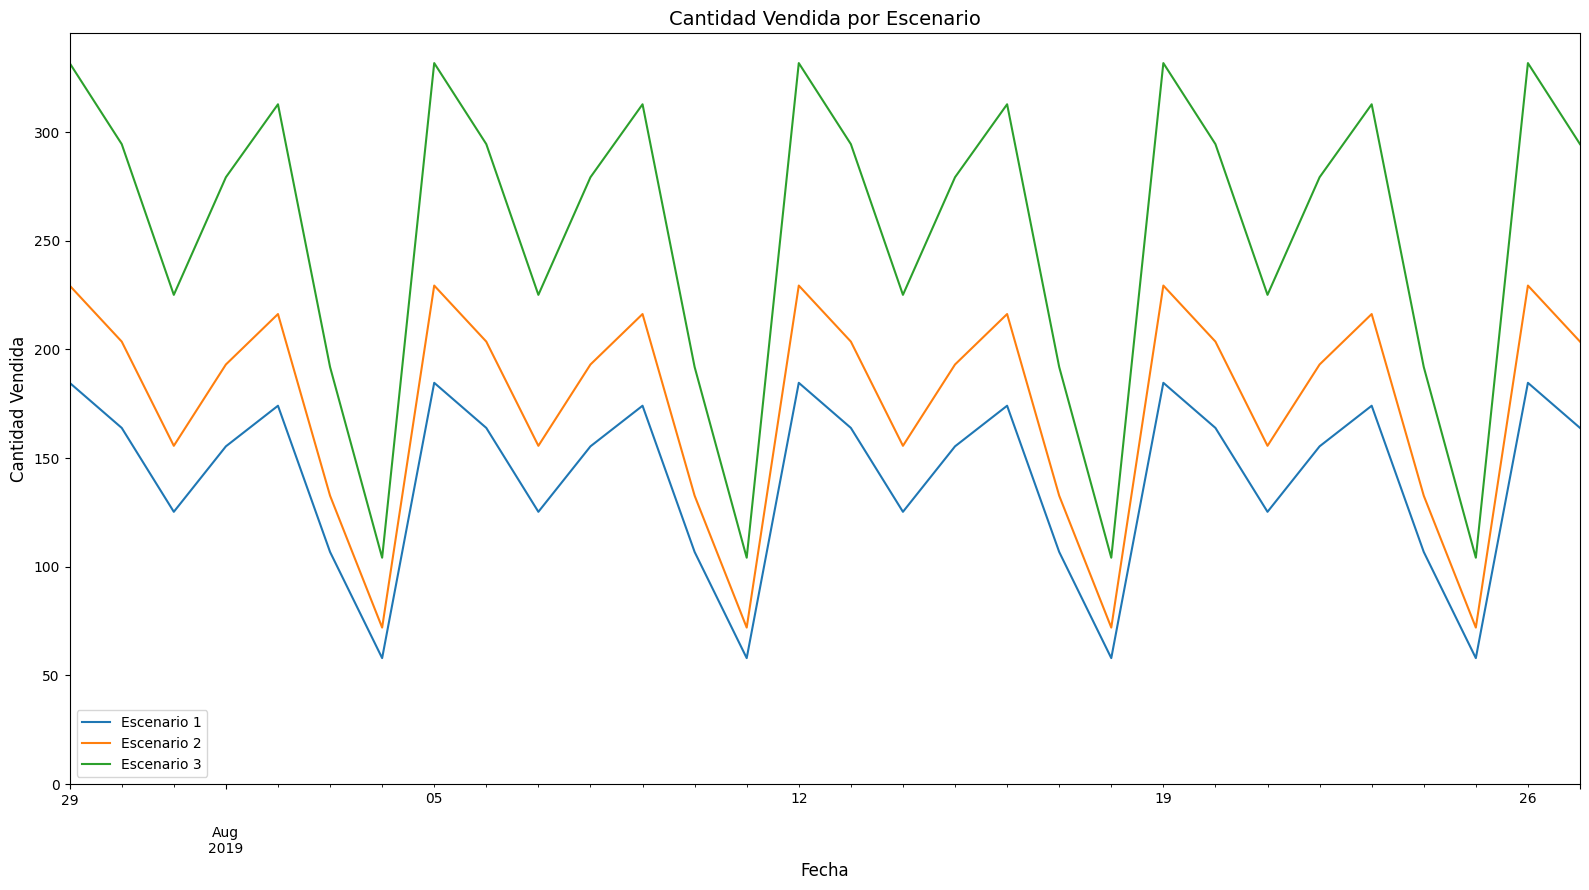

In [28]:
# Graficar los resultados de cantidad para los tres escenarios
ax = futuro.set_index('fecha')[['PrecioCompra1cantidad', 'PrecioCompra2cantidad', 'PrecioCompra3cantidad']].plot(figsize=(16,9))

# Agregar título y etiquetas
ax.set_title('Cantidad Vendida por Escenario', fontsize=14)
ax.set_xlabel('Fecha', fontsize=12)
ax.set_ylabel('Cantidad Vendida', fontsize=12)

# Establecer el eje y para que comience en 0
ax.set_ylim(bottom=0)

# Agregar leyenda con etiquetas personalizadas para los escenarios
ax.legend(['Escenario 1', 'Escenario 2', 'Escenario 3'])

# Mostrar el gráfico
plt.tight_layout()
plt.show()